In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/modelling_data.csv')
data.head()

,Unnamed: 0,period,start_date,end_date,revenue_index,total_spend_index,gross_orders_index,weekly_active_users_index,quarter,order_number,spend_per_user,prev_spend_per_user,prev_order_volume
0,0,2018Q1,2018-01-01,2018-02-28,100.000000,1.020328,1.231231,2.212380,2018Q1,3.502934e+07,0.461190,NaN,NaN
1,1,2018Q2,2018-03-01,2018-06-30,253.521127,3.907097,3.719492,5.080265,2018Q2,3.688433e+07,0.769073,0.461190,3.502934e+07
2,2,2018Q3,2018-07-01,2018-08-31,139.788732,9.063225,9.020529,12.989319,2018Q3,3.870401e+07,0.697744,0.769073,3.688433e+07
3,3,2018Q4,2018-09-01,2018-12-31,306.161972,15.179657,16.395936,19.686191,2018Q4,4.096009e+07,0.771081,0.697744,3.870401e+07
4,4,2019Q1,2019-01-01,2019-02-28,117.693662,13.636270,14.917859,25.002324,2019Q1,4.327519e+07,0.545400,0.771081,4.096009e+07


In [14]:
data.drop(index=data.index[0], axis=0, inplace=True)

# Feature Selection
- use a correlation matrix for feature selection. There is many important things to keep in my mind when choosing features for linear regression models.
- features with a strong correlation to the target variable (positive or negative) are likely more useful for prediction.
- need to be careful of multicollinearity (high correlation between the independent variables)
    - potentially look at using PCA to reduce the dimensionality of your dataset.

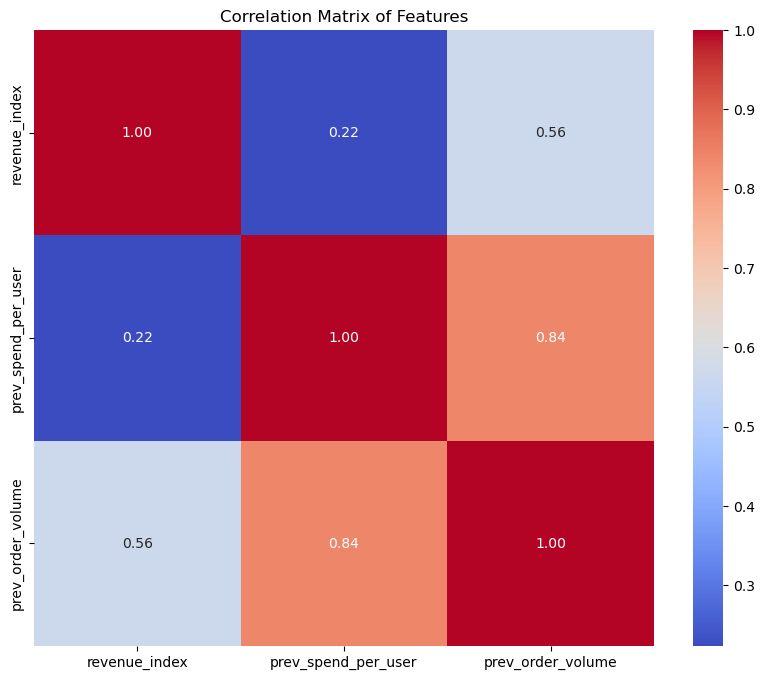

In [29]:
# Calculate the correlation matrix
df = data[['revenue_index', 'prev_spend_per_user', 'prev_order_volume']]
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [15]:
X = data[['prev_spend_per_user', 'prev_order_volume', 'period']]
y = data[['revenue_index', 'period']]

In [16]:
X_train = X[X['period']!= '2022Q4'].drop(columns=['period'])
X_test = X[X['period']== '2022Q4'].drop(columns=['period'])
y_train = y[y['period']!= '2022Q4'].drop(columns=['period'])
y_test = y[y['period']== '2022Q4'].drop(columns=['period'])

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Its important to note that we can not get an R2 score in the test set as we are only testing on one quarter.

In [22]:
# 5. Make predictions
y_pred = model.predict(X_test)

# Make predictions on the training data
train_predictions = model.predict(X_train)

# Calculate the in-sample R-squared
train_r_squared = r2_score(y_train, train_predictions)
print(f'In-sample R-squared: {train_r_squared:.4f}')

# Calculate the in-sample Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, train_predictions)
print(f'In-sample Mean Squared Error: {train_mse:.2f}')

In-sample R-squared: 0.4550
In-sample Mean Squared Error: 8072.84


In [25]:
# 5. Make predictions
y_pred = model.predict(X_test)

# Make predictions on the training data
train_predictions = model.predict(X_train)

# Calculate the in-sample R-squared
train_r_squared = r2_score(y_train, train_predictions)
print(f'In-sample R-squared: {train_r_squared:.4f}')

# Calculate the in-sample Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, train_predictions)
print(f'In-sample Mean Squared Error: {train_mse:.2f}')

# Get the model coefficients
coefficients = model.coef_
print("Model Coefficients:")
if len(coefficients) == X_train.shape[1]:
    print(f"  total_orders_approx: {coefficients[0]:.4f}")
    print(f"  total_spend_index_mean: {coefficients[1]:.4f}")
    print(f"  weekly_active_users_index_mean: {coefficients[2]:.4f}")
else:
    print(f"  Coefficients: {coefficients}")
    print("  Note: The number of coefficients does not match the number of features in X_train.")

In-sample R-squared: 0.4550
In-sample Mean Squared Error: 8072.84
Model Coefficients:
  Coefficients: [[-5.27141604e+02  1.06858142e-05]]
  Note: The number of coefficients does not match the number of features in X_train.
